# Market Basket Analyis of a Grocery Store
Executed Market Basket Analysis by applying Apriori and association rule algorithms to a grocery store's transactional datasets, extracting high-value item affinities and translating these patterns into actionable recommendations for operational and merchandising decisions.

# Importing Libraries 
Imported standard libraries such as Pandas and NumPy, along with the mlxtend library to apply the Apriori algorithm and association rule mining for generating meaningful association patterns.

In [1]:
import mlxtend
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori,association_rules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Creation
Utilized Pandas’ read_csv() method to import the locally stored CSV file and initialize the dataset for analysis.

In [2]:
df=pd.read_csv("Groceries_dataset.csv")
print(df.head())
df.shape

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


(38765, 3)

# Checking For Null Values
No null values were found. Hence, This dataset is ready for further steps.

In [3]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

# Preparations before creating items and rules
Grouping the data by member and date enables the creation of transaction baskets for each customer on each specific day.

In [4]:
basket = (df.groupby(['Member_number', 'Date'])['itemDescription']
           .apply(list)
           .reset_index(name='items'))

print(basket.head())

   Member_number        Date  \
0           1000  15-03-2015   
1           1000  24-06-2014   
2           1000  24-07-2015   
3           1000  25-11-2015   
4           1000  27-05-2015   

                                               items  
0  [sausage, whole milk, semi-finished bread, yog...  
1                  [whole milk, pastry, salty snack]  
2                     [canned beer, misc. beverages]  
3                        [sausage, hygiene articles]  
4                         [soda, pickled vegetables]  


# Data Transformation
Used TransactionEncoder to encode transactional data into a one-hot encoded structure, enabling proper preprocessing for Apriori and association rule algorithms—unlike standard encoding methods used in typical data science tasks.

In [5]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket['items']).transform(basket['items'])
basket_df = pd.DataFrame(te_ary, columns=te.columns_)
basket_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Creating frequent itemset
Applied the Apriori algorithm to identify and generate frequent itemsets by evaluating how often individual items and item combinations appear across customer baskets. The algorithm uses a minimum support threshold—chosen based on the dataset’s size and distribution—to ensure that only meaningful and consistently occurring patterns are retained for further analysis.

In [6]:
frequent_items = apriori(basket_df, min_support=0.002, use_colnames=True)
print(frequent_items.sort_values('support', ascending=False).head(10))
print(frequent_items.shape)

      support            itemsets
123  0.157923        (whole milk)
78   0.122101  (other vegetables)
93   0.110005        (rolls/buns)
104  0.097106              (soda)
124  0.085879            (yogurt)
94   0.069572   (root vegetables)
116  0.067767    (tropical fruit)
7    0.060683     (bottled water)
99   0.060349           (sausage)
24   0.053131      (citrus fruit)
(330, 2)


# Checking for amount of items in a set
This step enables us to set suitable metric values—such as minimum confidence and lift—when generating association rules. This step ensures that only strong and meaningful relationships between items are considered.

In [7]:
frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))
frequent_items['length'].value_counts()

length
2    204
1    126
Name: count, dtype: int64

# Generating Association Rules 
Using the association_rules function, we then generate the actual association rules from the frequent itemsets. These rules help uncover meaningful insights about how items tend to appear together. In this case, confidence is chosen as the primary evaluation metric, and the threshold is set relatively low because each transaction contains no more than two items, which naturally limits the number and strength of possible rules.

In [8]:
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
print(rules.shape)
rules.sort_values('lift', ascending=False).head(10)


(61, 14)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
23,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,1.0,5.355097e-04,1.016420,0.108146,0.033261,0.016154,0.089214
14,(chocolate),(rolls/buns),0.023592,0.110005,0.002807,0.118980,1.081592,1.0,2.117455e-04,1.010188,0.077260,0.021461,0.010085,0.072248
25,(frozen meals),(other vegetables),0.016775,0.122101,0.002139,0.127490,1.044134,1.0,9.039652e-05,1.006176,0.042990,0.015640,0.006138,0.072503
35,(meat),(other vegetables),0.016842,0.122101,0.002139,0.126984,1.039991,1.0,8.223631e-05,1.005593,0.039112,0.015633,0.005562,0.072250
30,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,1.0,3.821049e-05,1.002659,0.014188,0.015904,0.002652,0.088754
3,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,1.0,1.303311e-05,1.000682,0.004984,0.018930,0.000681,0.072297
28,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,1.0,5.091755e-07,1.000017,0.000141,0.026679,0.000017,0.072021
6,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,1.0,-4.792503e-06,0.999874,-0.000702,0.036469,-0.000126,0.101549
42,(salty snack),(other vegetables),0.018780,0.122101,0.002205,0.117438,0.961807,1.0,-8.757819e-05,0.994716,-0.038896,0.015904,-0.005312,0.067750
10,(candy),(whole milk),0.014369,0.157923,0.002139,0.148837,0.942468,1.0,-1.305499e-04,0.989326,-0.058322,0.012569,-0.010790,0.081190


# Data Visualization 
Visualizing the results makes them easier to understand and interpret, especially when dealing with patterns generated from association rule mining. To support this, two different visualizations are created, each designed to highlight key relationships and make the insights more accessible.

# Barplot of top 10 frequent items
A bar plot of the top 10 frequent items is generated, ranked according to their support values. This visualization helps identify which items are most commonly purchased across all transactions. By focusing on support, we can clearly see the products that appear most often in customer baskets, giving us an understanding of overall buying patterns.

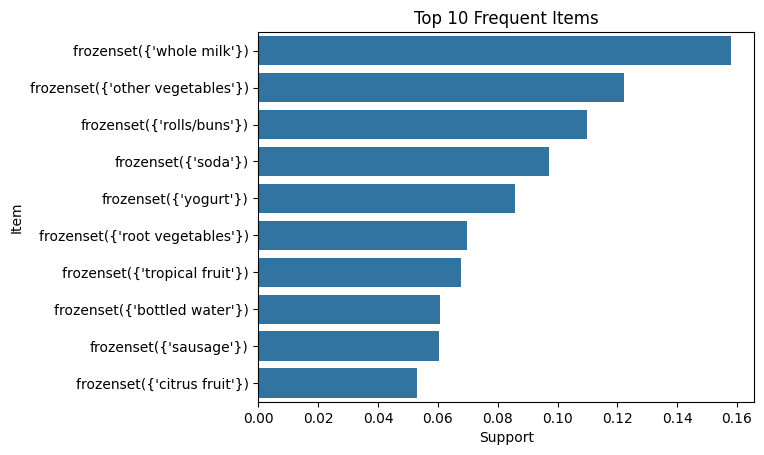

In [9]:
top_items = frequent_items.sort_values('support', ascending=False).head(10)
sns.barplot(x='support', y=top_items['itemsets'].astype(str), data=top_items)
plt.title('Top 10 Frequent Items')
plt.xlabel('Support')
plt.ylabel('Item')
plt.show()


# Scatterplot of support vs confidence
This scatter plot provides a quick, high-level view of the quality and distribution of all generated association rules. By mapping key metrics such as support, confidence, and lift, it allows us to visually assess how strong or weak the rules are. Even rules with lower strength become easier to identify and interpret when represented in this format, making it a valuable tool for evaluating overall rule performance.

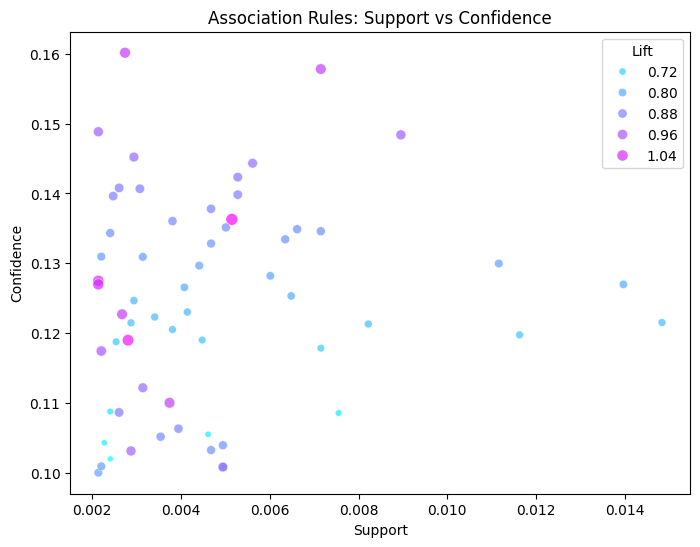

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='cool', alpha=0.7)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

# Conclusion
The Market Basket Analysis showed that although categories like dairy, fruits, and vegetables appear frequently in customer transactions, the dataset contains very few strong item-to-item associations. This indicates that customer baskets are highly individualized rather than driven by consistent co-purchase patterns. 
From a business standpoint, these findings highlight an opportunity to introduce targeted promotions, curated bundles, or cross-selling strategies to encourage stronger and more predictable product pairings across the store.